In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = (
    tf.keras.datasets.mnist.load_data()
)

train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def compile_and_train(model):
    optimizer = keras.optimizers.AdamW(learning_rate=0.001)

    early_stop = keras.src.callbacks.EarlyStopping(
        monitor="val_loss", patience=3, restore_best_weights=True
    )

    lr_schedule = keras.src.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=1
    )

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    history = model.fit(
        train_images,
        train_labels,
        validation_split=0.2,
        epochs=50,
        batch_size=128,
        callbacks=[lr_schedule, early_stop], # Learning rate scheduling & early stop
        verbose=1,
    )
    return history

In [5]:
model_1 = keras.Sequential([
    keras.layers.Input(shape=(784,)),

    keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.001)),  # L2 regularization
    keras.layers.Activation("relu"),

    keras.layers.Dense(256),
    keras.layers.Activation("relu"),

    keras.layers.Dense(10, activation="softmax")
])


model_2 = keras.Sequential([
    keras.layers.Input(shape=(784,)),

    keras.layers.Dense(512),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.3),  # Dropout 30% of neurons

    keras.layers.Dense(256),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),  # Dropout 20% of neurons

    keras.layers.Dense(10, activation="softmax")
])

In [6]:
history_1 = compile_and_train(model_1)
history_2 = compile_and_train(model_2)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8657 - loss: 0.7996 - val_accuracy: 0.9628 - val_loss: 0.2732 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9632 - loss: 0.2497 - val_accuracy: 0.9662 - val_loss: 0.2013 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9723 - loss: 0.1804 - val_accuracy: 0.9716 - val_loss: 0.1715 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9764 - loss: 0.1539 - val_accuracy: 0.9709 - val_loss: 0.1642 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9795 - loss: 0.1337 - val_accuracy: 0.9693 - val_loss: 0.1670 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9790 - loss: 0.1334 - val_accuracy: 0.9730 - val_loss: 0.1630 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9840 - loss: 

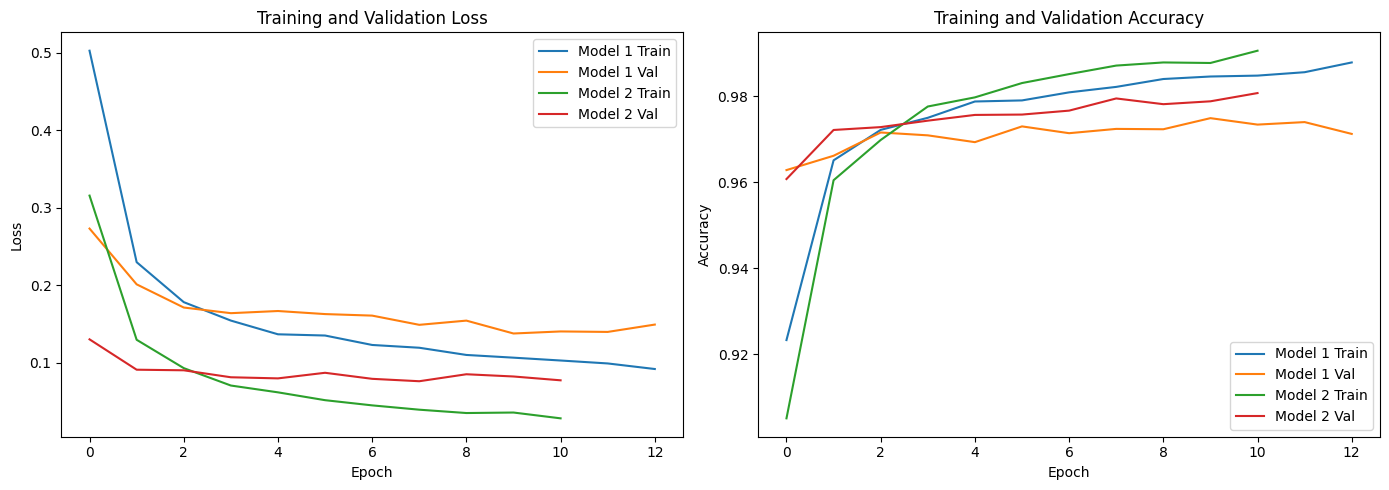

In [7]:
def plot_history(histories, names):
    plt.figure(figsize=(14, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, names):
        plt.plot(history.history["loss"], label=f"{name} Train")
        plt.plot(history.history["val_loss"], label=f"{name} Val")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, names):
        plt.plot(history.history["accuracy"], label=f"{name} Train")
        plt.plot(history.history["val_accuracy"], label=f"{name} Val")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_history([history_1, history_2], ["Model 1", "Model 2"])

In [8]:
test_loss_a, test_acc_a = model_1.evaluate(test_images, test_labels, verbose=0)
test_loss_b, test_acc_b = model_2.evaluate(test_images, test_labels, verbose=0)

print(f"Model 1 - Test Accuracy: {test_acc_a:.4f}, Test Loss: {test_loss_a:.4f}")
print(f"Model 2 - Test Accuracy: {test_acc_b:.4f}, Test Loss: {test_loss_b:.4f}")

Model 1 - Test Accuracy: 0.9758, Test Loss: 0.1360
Model 2 - Test Accuracy: 0.9791, Test Loss: 0.0715


Model 1 :

L2 Regularization: Uses L2 weight regularization (λ=0.001) on the first dense layer to penalize large weights and reduce overfitting.


Sequential Architecture: Built using a linear stack of layers (Sequential API).

ReLU Activation: Uses Rectified Linear Unit (ReLU) activation functions in hidden layers.

Softmax Output: Final layer has a softmax activation for multi-class classification (10 classes).

Model 2 :

Dropout Layers: Incorporates dropout regularization (30% in the first hidden layer, 20% in the second) to prevent overfitting by randomly deactivating neurons.


Sequential Architecture: Also built using a linear stack of layers (Sequential API).


ReLU Activation: Uses ReLU activation functions in hidden layers.


Softmax Output: Final layer has a softmax activation for multi-class classification (10 classes).
